Name: Gangyu Pan    
ID: 8256447650     
Email: gangyupa@usc.edu


1. Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.


(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

(b). Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

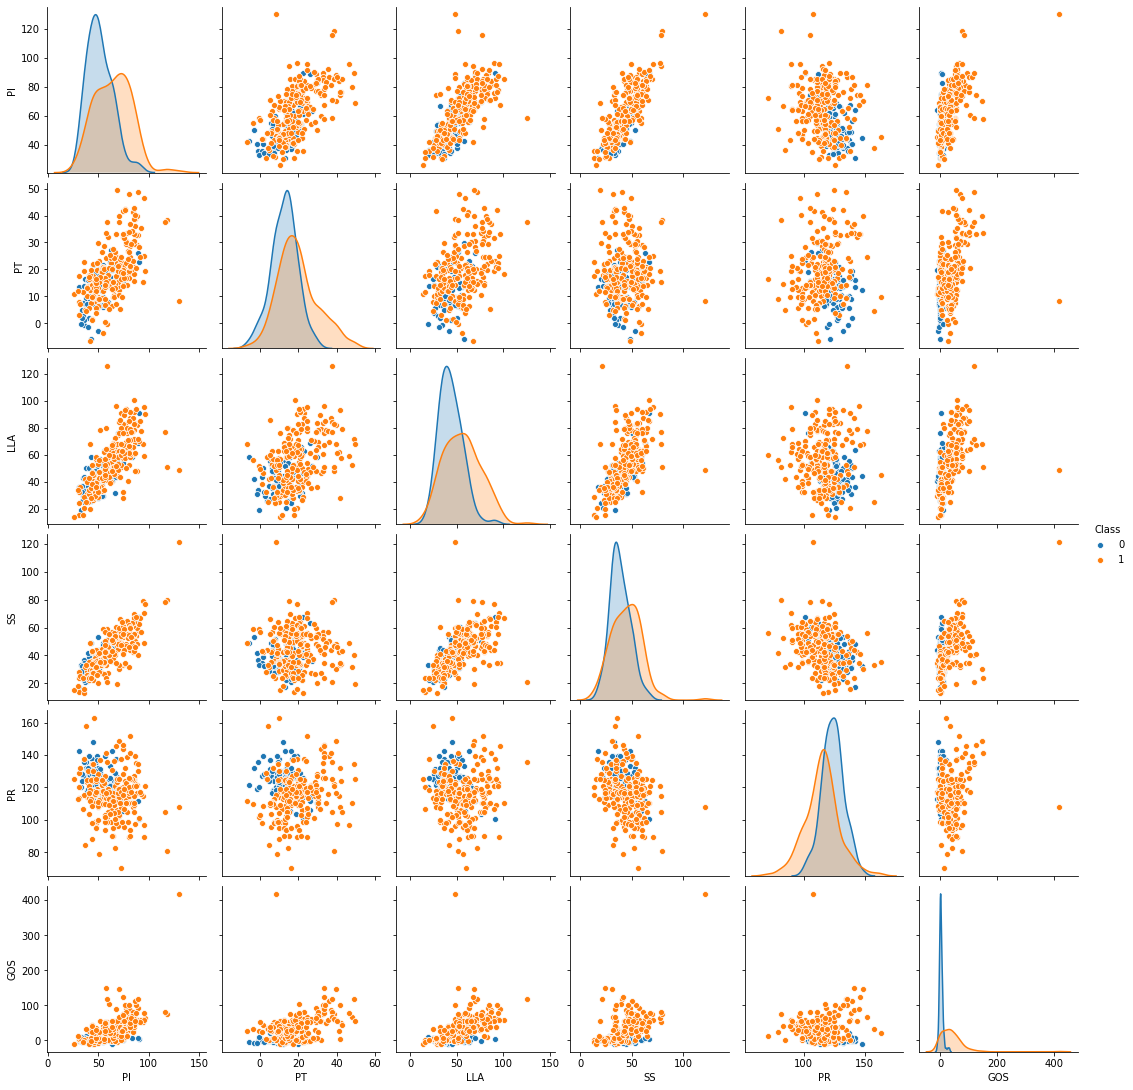

In [2]:
import seaborn as sns

#read .dat file as a dataframe
Data_1 = pd.read_table('../data/column_2C.dat',header=None,sep='\s+' )
# Add name for every columns 
# PI: pelvic incidence, PT: pelvic tilt, LLA: lumbar lordosis angle, SS: sacral slope, PR: pelvic radius, GOS: grade of spondylolisthesis , Class
Data_1.columns = ['PI' ,'PT' ,'LLA' ,'SS' ,'PR' ,'GOS' , 'Class']
# relace NO to 0, AB to 1
Data_1["Class"].replace({"NO": "0", "AB": "1"}, inplace=True)
sns.pairplot(Data_1, hue="Class")

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

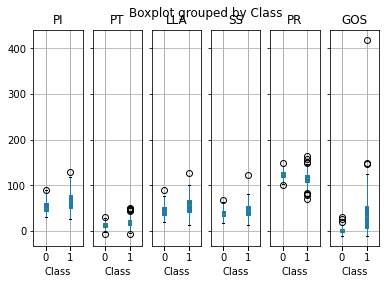

In [3]:
BoxF = Data_1.boxplot(column=['PI' ,'PT' ,'LLA' ,'SS' ,'PR' ,'GOS'], by='Class',patch_artist=True,layout=(1,6))
plt.show()

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [4]:
Data_C0 = Data_1[Data_1['Class'] == '0']
Data_C1 = Data_1[Data_1['Class'] == '1']
Data_C0.reset_index(drop=True, inplace=True)
Data_C1.reset_index(drop=True, inplace=True)
Data_Train = Data_C1.loc[:139]
Data_Train = Data_Train.append(Data_C0.loc[:69], ignore_index=True)
Data_Test = Data_C1.loc[140:]
Data_Test = Data_Test.append(Data_C0.loc[70:], ignore_index=True)
print(Data_Train)
print(Data_Test)

        PI     PT    LLA     SS      PR    GOS Class
0    63.03  22.55  39.61  40.48   98.67  -0.25     1
1    39.06  10.06  25.02  29.00  114.41   4.56     1
2    68.83  22.22  50.09  46.61  105.99  -3.53     1
3    69.30  24.65  44.31  44.64  101.87  11.21     1
4    49.71   9.65  28.32  40.06  108.17   7.92     1
..     ...    ...    ...    ...     ...    ...   ...
205  67.29  16.72  51.00  50.57  137.59   4.96     0
206  51.33  13.63  33.26  37.69  131.31   1.79     0
207  65.76  13.21  44.00  52.55  129.39  -1.98     0
208  40.41  -1.33  30.98  41.74  119.34  -6.17     0
209  48.80  18.02  52.00  30.78  139.15  10.44     0

[210 rows x 7 columns]
       PI     PT     LLA     SS      PR     GOS Class
0   69.56  15.40   74.44  54.16  105.07   29.70     1
1   89.50  48.90   72.00  40.60  134.63  118.35     1
2   85.29  18.28  100.74  67.01  110.66   58.88     1
3   60.63  20.60   64.54  40.03  117.23  104.86     1
4   60.04  14.31   58.04  45.73  105.13   30.41     1
..    ...    ...

(c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [6]:
from sklearn.neighbors import KNeighborsClassifier

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.


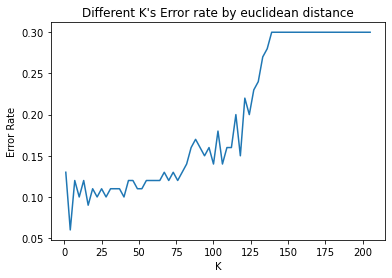

The minimum Error Rate is: 0.060000 , and corresponding K value is: 4, Precision is 0.940000, F1_score is 0.925595. 
Confusion_matrix is 
 [[25  5]
 [ 1 69]]


In [7]:
# import packages for calculating confusion_matrix,precision_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# take out columns name from data
X_Columns = ['PI' ,'PT' ,'LLA' ,'SS' ,'PR' ,'GOS']
Y_Columns = ['Class']
# set some lists for storing data
Precision_score = []
Accuracy_score = []
Confusion_matrix = []
F1_score = []
Error_rate = []
K =  np.arange(1, 208, 3).tolist()
# Loop K from 1 to 208 
for k in K:
    # classify point by euclidean_distance
    KNN = KNeighborsClassifier(n_neighbors = k, p = 2 ) # When p = 2, this is equivalent to using euclidean_distance.
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Confusion_matrix ,Accuracy_score,  Precision_score,F1_score
    Confusion_matrix.append(confusion_matrix(Data_Test['Class'], Predictions))
    Accuracy_score.append(accuracy_score(Data_Test['Class'], Predictions))
    Precision_score.append(np.sum(Data_Test['Class'] == Predictions) / len(Predictions))
    F1_score.append(f1_score(Data_Test['Class'], Predictions, average='macro'))

# calculate Error rate : Error rate = 1 -  Accuracy_score
Error_rate = [1 - i for i in Accuracy_score]
# plot line chart : X: K , Y :Error Rate
plt.plot(K,Error_rate)
plt.title("Different K's Error rate by euclidean distance")
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
# Find the corresponding K value with minimum Error Rate
print('The minimum Error Rate is: %f , and corresponding K value is: %d, Precision is %f, F1_score is %f. '% (min(Error_rate), K[Error_rate.index(min(Error_rate))], Precision_score[Error_rate.index(min(Error_rate))], F1_score[Error_rate.index(min(Error_rate))]))
print('Confusion_matrix is \n', Confusion_matrix[Error_rate.index(min(Error_rate))])

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test
error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.4 Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in ??. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

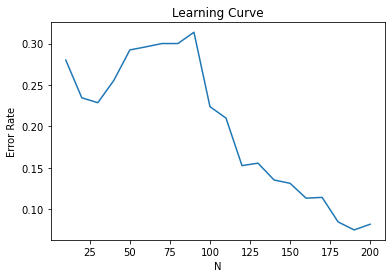

The minimum Error Rate is: 0.075000 , and corresponding N value is: 190 


In [8]:
# create a list for size of training  
N = np.arange(10, 210, 10).tolist()
# create two empty lists
Accuracy_scores = []
Error_rate1 = []

# Process different N to obtain the smallest set of error rates
for n in N:
    Data_Train1 = Data_C1.loc[:n - int(n/3)-1]
    Data_Train1 = Data_Train1.append(Data_C0.loc[:int(n/3)-1], ignore_index=True)
    Data_Test1 = Data_C1.loc[n - int(n/3):]
    Data_Test1 = Data_Test1.append(Data_C0.loc[int(n/3):], ignore_index=True)
    Accuracy_score1 = []
    Accuracy_score11 = []
    k = 1
    # select different k value for obtaining the smallest set of error rates
    while k < n:
        if k > 196:
            break
        # classify point by euclidean_distance
        KNN = KNeighborsClassifier(n_neighbors = k, p = 2 ) # When p = 2, this is equivalent to using euclidean_distance.
        # Train on training data
        KNN.fit(Data_Train1[X_Columns], Data_Train1[Y_Columns].values.ravel())
        # Make predictions on test data, and change to list
        Predictions1 = np.array(KNN.predict(Data_Test1[X_Columns])).tolist() 
        # calculate Accuracy_score
        Accuracy_score1.append(accuracy_score(Data_Test1['Class'], Predictions1))
        Accuracy_score11 = max(np.array(Accuracy_score1))
        k += 5
    Accuracy_scores.append(Accuracy_score11)
# calculate Error rate : Error rate = 1 -  Accuracy_score
Accuracy_scores = np.array(Accuracy_scores)
Error_rate1[:] = 1 - Accuracy_scores[:] 
# plot line chart:  X: N , Y :Error Rate
plt.plot(N,Error_rate1)
plt.title("Learning Curve")
plt.xlabel('N')
plt.ylabel('Error Rate')
plt.show()
# Find the corresponding N value with minimum Error Rate
print('The minimum Error Rate is: %f , and corresponding N value is: %d '% (min(Error_rate1), N[Error_rate1.index(min(Error_rate1))]))

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.
B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found
for the Manhattan distance in ??. What is the best log10(p)?
C. which becomes Chebyshev Distance with p → ∞

In [9]:
# For d(i)A Minkowski Distance(p = 1)
# set a list for storing data
Accuracy_score2 = []
K1 =  np.arange(1, 196, 5).tolist()
# Loop K from 1 to 196, find the corresponding K for minimum Error Rate
for k in K1:
    Error_rate2 = []
    KNN = KNeighborsClassifier(n_neighbors = k, p = 1 ) # When p = 1, this is equivalent to using Minkowski Distance.
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions2 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Confusion_matrix ,Accuracy_score,  Precision_score,F1_score
    Accuracy_score2.append(accuracy_score(Data_Test['Class'], Predictions2))
Error_rate2 = [1 - i for i in Accuracy_score2]
Table_2 = pd.DataFrame({'K':K1,'Error Rate':Error_rate2})
Best_k2 = list(Table_2[Table_2['Error Rate'] == min(Table_2['Error Rate'])]['K'])
print(Table_2)

print('The minimum Error Rate is: %f ' %(min(Error_rate2)))
print('The corresponding K value is{}'.format(Best_k2))

      K  Error Rate
0     1        0.12
1     6        0.11
2    11        0.11
3    16        0.12
4    21        0.12
5    26        0.11
6    31        0.12
7    36        0.13
8    41        0.13
9    46        0.13
10   51        0.14
11   56        0.13
12   61        0.15
13   66        0.15
14   71        0.14
15   76        0.14
16   81        0.16
17   86        0.15
18   91        0.20
19   96        0.20
20  101        0.22
21  106        0.21
22  111        0.23
23  116        0.21
24  121        0.22
25  126        0.24
26  131        0.28
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
The minimum Error Rate is: 0.110000 
The corresponding K value is[6, 11, 26]


In [10]:
# For d(i)B Use the best K to find Best log10(p)
Accuracy_score3 = []
# set a list for log10(p) range
i = np.arange(0.1, 1, 0.1).tolist()
I = [10 ** j for j in i]
for P in I:
    Error_rate3 = []
    # classify point by different p
    KNN = KNeighborsClassifier(n_neighbors = K1[Error_rate2.index(min(Error_rate2))], p = P )
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions3 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Accuracy_score
    Accuracy_score3.append(accuracy_score(Data_Test['Class'], Predictions3))
Error_rate3 = [1 - i for i in Accuracy_score3]
Table_3 = pd.DataFrame({'log10(P)':i,'Error Rate':Error_rate3})
print(Table_3)
print('The minimum Error Rate is: %f , and best log10(p) is: %f '% (min(Error_rate3), i[Error_rate3.index(min(Error_rate3))]))


   log10(P)  Error Rate
0       0.1        0.09
1       0.2        0.09
2       0.3        0.08
3       0.4        0.08
4       0.5        0.08
5       0.6        0.06
6       0.7        0.07
7       0.8        0.08
8       0.9        0.09
The minimum Error Rate is: 0.060000 , and best log10(p) is: 0.600000 


In [11]:
#  For d(i)C  Chebyshev Distance( p → ∞ )
# set a list for storing data
Accuracy_score4 = []
# Loop K from 1 to 196, find the corresponding K for minimum Error Rate
for k in K1:
    Error_rate4 = []
    # classify point by Chebyshev Distance
    KNN = KNeighborsClassifier(n_neighbors = k, p = float('inf') ) # When p→ ∞ , this is equivalent to using Chebyshev Distance.
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions4 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate,Accuracy_score
    Accuracy_score4.append(accuracy_score(Data_Test['Class'], Predictions4))
    
Error_rate4 = [1 - i for i in Accuracy_score4]
Table_4 = pd.DataFrame({'K':K1,'Error Rate':Error_rate4})
print(Table_4)
Best_k4 = list(Table_4[Table_4['Error Rate'] == min(Table_4['Error Rate'])]['K'])
print('The minimum Error Rate is: %f ' %(min(Error_rate4)))
print('The corresponding K value is{}'.format(Best_k4))


      K  Error Rate
0     1        0.13
1     6        0.09
2    11        0.12
3    16        0.08
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.12
10   51        0.12
11   56        0.12
12   61        0.14
13   66        0.13
14   71        0.14
15   76        0.11
16   81        0.14
17   86        0.12
18   91        0.15
19   96        0.14
20  101        0.19
21  106        0.18
22  111        0.18
23  116        0.18
24  121        0.21
25  126        0.21
26  131        0.25
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
The minimum Error Rate is: 0.080000 
The corresponding K value is[16]


ii. Mahalanobis Distance.

In [12]:
#  Mahalanobis Distance(distance between two points in multivariate space)
# set a list for storing data
Accuracy_score5 = []
# Loop K from 1 to 196, find the corresponding K for minimum Error Rate
for k in K1:
    Error_rate5 = []
    KNN = KNeighborsClassifier(n_neighbors = k,metric = 'mahalanobis',metric_params={'VI':pd.DataFrame(Data_Train.cov().values)}) # Using Mahalanobis Distance
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions5 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Accuracy_score
    Accuracy_score5.append(accuracy_score(Data_Test['Class'], Predictions5))
Error_rate5 = [1 - i for i in Accuracy_score5]    
Table_5 = pd.DataFrame({'K':K1,'Error Rate':Error_rate5})
print(Table_5)
Best_k5 = list(Table_5[Table_5['Error Rate'] == min(Table_5['Error Rate'])]['K'])
print('The minimum Error Rate is: %f ' %(min(Error_rate5)))
print('The corresponding K value is{}'.format(Best_k5))


      K  Error Rate
0     1        0.12
1     6        0.08
2    11        0.09
3    16        0.08
4    21        0.10
5    26        0.09
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.11
10   51        0.11
11   56        0.09
12   61        0.16
13   66        0.12
14   71        0.12
15   76        0.09
16   81        0.11
17   86        0.10
18   91        0.15
19   96        0.09
20  101        0.16
21  106        0.15
22  111        0.19
23  116        0.08
24  121        0.12
25  126        0.10
26  131        0.21
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
The minimum Error Rate is: 0.080000 
The corresponding K value is[6, 16, 116]


(e)The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [13]:
# Use weighted voting with Euclidean Distance
K2 =  np.arange(1, 196, 5).tolist()
Accuracy_score6 = []
# Loop K from 1 to 196 
for k in K2:
    Error_rate6 = []
    # classify point by euclidean_distance
    KNN = KNeighborsClassifier(n_neighbors = k,weights ='distance', p = 2 ) # When p = 2, this is equivalent to using .
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions6 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Confusion_matrix ,Accuracy_score,  Precision_score,F1_score
    Accuracy_score6.append(accuracy_score(Data_Test['Class'], Predictions6))

# calculate Error rate : Error rate = 1 -  Accuracy_score
Error_rate6 = [1 - i for i in Accuracy_score6]
Table_6 = pd.DataFrame({'K':K2,'Error Rate':Error_rate6})
Best_k6 = list(Table_6[Table_6['Error Rate'] == min(Table_6['Error Rate'])]['K'])
print('The minimum Error Rate is: %f ' %(min(Error_rate6)))
print('The corresponding K value is{}'.format(Best_k6))

The minimum Error Rate is: 0.100000 
The corresponding K value is[6]


In [14]:
# Use weighted voting with Manhattan Distance
Accuracy_score7 = []
# Loop K from 1 to 196 
for k in K2:
    Error_rate7 = []
    # classify point by euclidean_distance
    KNN = KNeighborsClassifier(n_neighbors = k,weights ='distance', p = 1 ) # When p = 1, this is equivalent to using Manhattan Distance.
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions7 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Confusion_matrix ,Accuracy_score,  Precision_score,F1_score
    Accuracy_score7.append(accuracy_score(Data_Test['Class'], Predictions7))

# calculate Error rate : Error rate = 1 -  Accuracy_score
Error_rate7 = [1 - i for i in Accuracy_score7]
Table_7 = pd.DataFrame({'K':K2,'Error Rate':Error_rate7})
Best_k7 = list(Table_7[Table_7['Error Rate'] == min(Table_7['Error Rate'])]['K'])
print('The minimum Error Rate is: %f ' %(min(Error_rate7)))
print('The corresponding K value is{}'.format(Best_k7))

The minimum Error Rate is: 0.100000 
The corresponding K value is[26]


In [15]:
# Use weighted voting with Chebyshev Distance
Accuracy_score8 = []

# Loop K from 1 to 196 
for k in K2:
    Error_rate8 = []

    # classify point by euclidean_distance
    KNN = KNeighborsClassifier(n_neighbors = k,weights ='distance', p = float('inf') ) # When p = 2, this is equivalent to using euclidean_distance.
    # Train on training data
    KNN.fit(Data_Train[X_Columns], Data_Train[Y_Columns].values.ravel())
    # Make predictions on test data, and change to list
    Predictions8 = np.array(KNN.predict(Data_Test[X_Columns])).tolist() 
    # calculate Confusion_matrix ,Accuracy_score,  Precision_score,F1_score
    
    Accuracy_score8.append(accuracy_score(Data_Test['Class'], Predictions8))
# calculate Error rate : Error rate = 1 -  Accuracy_score
Error_rate8 = [1 - i for i in Accuracy_score8]
Table_8 = pd.DataFrame({'K':K2,'Error Rate':Error_rate8})
Best_k8 = list(Table_8[Table_8['Error Rate'] == min(Table_8['Error Rate'])]['K'])
print('The minimum Error Rate is: %f ' %(min(Error_rate8)))
print('The corresponding K value is{}'.format(Best_k8))

The minimum Error Rate is: 0.110000 
The corresponding K value is[16, 31, 36, 41, 61]


(f)What is the lowest training error rate you achieved in this homework?

The lowest Error Rate is: 0.060000. There are several different situations:     
1). When distance is euclidean distance, and corresponding K value is: 4.     
2). When distance is Minkowski Distance, and corresponding log10(p) is 0.6    